# Part 1 - Scalars and Vectors

For the questions below it is not sufficient to simply provide answer to the questions, but you must solve the problems and show your work using python (the NumPy library will help a lot!) Translate the vectors and matrices into their appropriate python  representations and use numpy or functions that you write yourself to demonstrate the result or property. 

## 1.1 Create a two-dimensional vector and plot it on a graph

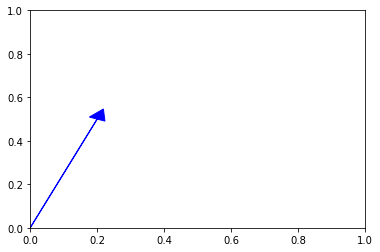

In [22]:
import matplotlib.pyplot as plt
import numpy as np

x, y, u, v = 0, 0, .2, .5
vector = np.array([x, y, u, v])
# 2 Dimensions
plt.arrow(x, y, u, v, head_width=0.05, head_length=0.05, color='b');

## 1.2 Create a three-dimensional vector and plot it on a graph

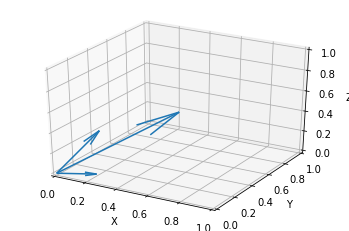

In [19]:
from mpl_toolkits.mplot3d import Axes3D


vectors = np.array([[0, 0, 0, .5, .5, .5], 
                    [0, 0, 0, .2, .1, .0],
                    [0, 0, 0, .1, .3, .3]])

X, Y, Z, U, V, W = zip(*vectors)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

## 1.3 Scale the vectors you created in 1.1 by $5$, $\pi$, and $-e$ and plot all four vectors (original + 3 scaled vectors) on a graph. What do you notice about these vectors? 

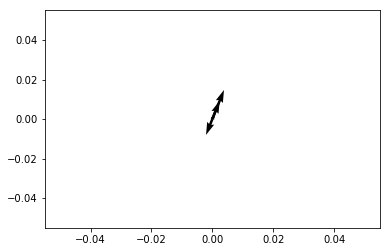

In [35]:
import math

X = np.array([0])
Y = np.array([0])
U = np.array([u, u*5, u*math.pi, u*math.e*-1])
V = np.array([v, v*5, v*math.pi, v*math.e*-1])

# These transformed vectors only scale the length, positively or negatively
plt.quiver(X, Y, U, V)

## 1.4 Graph vectors $\vec{a}$ and $\vec{b}$ and plot them on a graph

\begin{align}
\vec{a} = \begin{bmatrix} 5 \\ 7 \end{bmatrix}
\qquad
\vec{b} = \begin{bmatrix} 3 \\4 \end{bmatrix}
\end{align}

(0, 10)

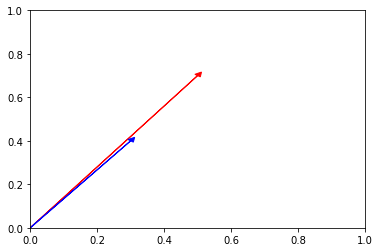

In [42]:
plt.arrow(0, 0, .5, .7, color='red', head_width=0.02, head_length=0.02)
plt.arrow(0, 0, .3, .4, color='blue', head_width=0.02, head_length=0.02);
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])

## 1.5 find $\vec{a} - \vec{b}$ and plot the result on the same graph as $\vec{a}$ and $\vec{b}$. Is there a relationship between vectors $\vec{a} \thinspace, \vec{b} \thinspace \text{and} \thinspace \vec{a-b}$

0.2 0.3


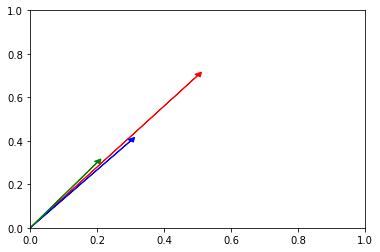

In [53]:
result = np.array([5,7]) - np.array([3,4])
plt.arrow(0, 0, .5, .7, color='red', head_width=0.02, head_length=0.02)
plt.arrow(0, 0, .3, .4, color='blue', head_width=0.02, head_length=0.02)
plt.arrow(0, 0, result[0]/10, result[1]/10, color='green', head_width=0.02, head_length=0.02);
print(result[0]/10, result[1]/10)
# There is a relationship: the resultant vector is the difference between the heads of vector a and vector b

## 1.6 Find $c \cdot d$

\begin{align}
\vec{c} = \begin{bmatrix}7 & 22 & 4 & 16\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}12 & 6 & 2 & 9\end{bmatrix}
\end{align}


In [54]:
c, d = np.array([7,22,4,16]), np.array([12,6,2,9])

# The dot product is the sum of multiplying each constiuent of the vectors
np.dot(c, d)

368

##  1.7 Find $e \times f$

\begin{align}
\vec{e} = \begin{bmatrix} 5 \\ 7 \\ 2 \end{bmatrix}
\qquad
\vec{f} = \begin{bmatrix} 3 \\4 \\ 6 \end{bmatrix}
\end{align}

In [71]:
# The cross product calculates a third vector that is perpendicular to the first two vectors
e, f = np.array([5,7,2]), np.array([3,4,6])
np.cross(e, f)

array([ 34, -24,  -1])

## 1.8 Find $||g||$ and then find $||h||$. Which is longer?

\begin{align}
\vec{e} = \begin{bmatrix} 1 \\ 1 \\ 1 \\ 8 \end{bmatrix}
\qquad
\vec{f} = \begin{bmatrix} 3 \\3 \\ 3 \\ 3 \end{bmatrix}
\end{align}

In [73]:
# Compute norm values for vectors e and f
e, f = np.array([1,1,1,8]), np.array([3,3,3,3])
# Vector e is longer
np.linalg.norm(e), np.linalg.norm(f)

(8.18535277187245, 6.0)

## 1.9 Show that the following vectors are orthogonal (perpendicular to each other):

\begin{align}
\vec{g} = \begin{bmatrix} 1 \\ 0 \\ -1  \end{bmatrix}
\qquad
\vec{h} = \begin{bmatrix} 1 \\ \sqrt{2} \\ 1 \end{bmatrix}
\end{align}

In [74]:
# If the dot product of two vectors is zero, then they are orthogonal
np.dot(np.array([1,0,-1]), np.array([1,math.sqrt(2),1]))

0.0

# Part 2 - Matrices

## 2.1 What are the dimensions of the following matrices? Which of the following can be multiplied together? See if you can find all of the different legal combinations.
\begin{align}
A = \begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{bmatrix}
\qquad
B = \begin{bmatrix}
2 & 4 & 6 \\
\end{bmatrix}
\qquad
C = \begin{bmatrix}
9 & 6 & 3 \\
4 & 7 & 11
\end{bmatrix}
\qquad
D = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\qquad
E = \begin{bmatrix}
1 & 3 \\
5 & 7
\end{bmatrix}
\end{align}

In [ ]:
# DIMENSIONALITY
# A: 3x2
# B: 1x3
# C: 2x3
# D: 3x3
# E: 2x2

# To determine if two matrices can be multiplied: columns on the left matrix must match rows in the right matrix dimensionally
# Legal combinations:
# AxC, AxE, BxA, CxD, DxA, ExC 

## 2.2 Find the following products: CD, AE, and BA. What are the dimensions of the resulting matrices? How does that relate to the dimensions of their factor matrices?

In [79]:
A = np.array([1,2,3,4,5,6]).reshape(3,2)
B = np.array([2,4,6]).reshape(1,3)
C = np.array([9,6,3,4,7,11]).reshape(2,3)
D = np.array([1,0,0,0,1,0,0,0,1]).reshape(3,3)
E = np.array([1,3,5,7]).reshape(2,2)
print(np.dot(C, D), '\n')
print(np.dot(A, E), '\n')
print(np.dot(B, A))

[[ 9  6  3]
 [ 4  7 11]] 

[[11 17]
 [23 37]
 [35 57]] 

[[44 56]]


-------------------
The dimensions of the resulting matrices are: 2x3, 3x2, 1x2

The first matrix is being multiplied by the identity matrix, so no values or dimensions change with respect to matrix C.

The second matrix has dimensions 3x2, which is equivalent to the dimensions of the left-side matrix/factor.

The last resultant matrix is of dimension 1x2, which is the same as the left-side matrix B.

## 2.3  Find $F^{T}$. How are the numbers along the main diagonal (top left to bottom right) of the original matrix and its transpose related? What are the dimensions of $F$? What are the dimensions of $F^{T}$?

\begin{align}
F = 
\begin{bmatrix}
20 & 19 & 18 & 17 \\
16 & 15 & 14 & 13 \\
12 & 11 & 10 & 9 \\
8 & 7 & 6 & 5 \\
4 & 3 & 2 & 1
\end{bmatrix}
\end{align}

In [82]:
F = np.array([20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]).reshape(5,4)
F.T

array([[20, 16, 12,  8,  4],
       [19, 15, 11,  7,  3],
       [18, 14, 10,  6,  2],
       [17, 13,  9,  5,  1]])

-------------------------------
The values along the main diagonal aren't modified when transposed. The dimension of F is 5x4 and the resultant matrix is 4x5.

# Part 3 - Square Matrices

## 3.1 Find $IG$ (be sure to show your work) 😃

\begin{align}
G= 
\begin{bmatrix}
12 & 11 \\
7 & 10 
\end{bmatrix}
\end{align}

In [83]:
G = np.array([12,11,7,10]).reshape(2,2)
np.matmul(G, np.identity(2))

array([[12., 11.],
       [ 7., 10.]])

## 3.2 Find $|H|$ and then find $|J|$.

\begin{align}
H= 
\begin{bmatrix}
12 & 11 \\
7 & 10 
\end{bmatrix}
\qquad
J= 
\begin{bmatrix}
0 & 1 & 2 \\
7 & 10 & 4 \\
3 & 2 & 0
\end{bmatrix}
\end{align}


In [84]:
H = np.array([12,11,7,10]).reshape(2,2)
J = np.array([0,1,2,7,10,4,3,2,0]).reshape(3,3)

print('Det. of H: ', np.linalg.det(H))
print('Det. of J: ', np.linalg.det(J))

Det. of H:  43.0
Det. of J:  -19.999999999999996


## 3.3 Find H^{-1} and then find J^{-1}

In [88]:
print('Inv. of H: \n', np.linalg.inv(H))
print('Inv. of J: \n', np.linalg.inv(J))

Inv. of H: 
 [[ 0.23255814 -0.25581395]
 [-0.1627907   0.27906977]]
Inv. of J: 
 [[ 0.4  -0.2   0.8 ]
 [-0.6   0.3  -0.7 ]
 [ 0.8  -0.15  0.35]]


## 3.4 Find $HH^{-1}$ and then find $G^{-1}G$. Is $HH^{-1} == G^{-1}G$? Why or Why not?

In [92]:
print('HH^{-1} = \n', np.matmul(H, np.linalg.inv(H)))
print('G^{-1}G = \n', np.matmul(np.linalg.inv(G), G))
print('Are they equal?')
print(np.matmul(H, np.linalg.inv(H)) == np.matmul(np.linalg.inv(G), G))

HH^{-1} = 
 [[ 1.00000000e+00  0.00000000e+00]
 [-2.22044605e-16  1.00000000e+00]]
G^{-1}G = 
 [[ 1.00000000e+00  0.00000000e+00]
 [-2.22044605e-16  1.00000000e+00]]
Are they equal?
[[ True  True]
 [ True  True]]


-------------
The two resultant matrices are equivalent because multiplying a matrix by its inverse always returns the identity matrix for its given dimensionality.

# Stretch Goals: 

A reminder that these challenges are optional. If you finish your work quickly we welcome you to work on them. If there are other activities that you feel like will help your understanding of the above topics more, feel free to work on that. Topics from the Stretch Goals sections will never end up on Sprint Challenges. You don't have to do these in order, you don't have to do all of them. 

- Write a function that can calculate the dot product of any two vectors of equal length that are passed to it.
- Write a function that can calculate the norm of any vector
- Prove to yourself again that the vectors in 1.9 are orthogonal by graphing them. 
- Research how to plot a 3d graph with animations so that you can make the graph rotate (this will be easier in a local notebook than in google colab)
- Create and plot a matrix on a 2d graph.
- Create and plot a matrix on a 3d graph.
- Plot two vectors that are not collinear on a 2d graph. Calculate the determinant of the 2x2 matrix that these vectors form. How does this determinant relate to the graphical interpretation of the vectors?

